In [186]:
# 당뇨병 환자의 데이터 
from sklearn.datasets import load_diabetes
# 데이터를 정한 클래스 = bunch class
diabetes = load_diabetes()

In [187]:
# data
print(diabetes.data.shape)
# target
print(diabetes.target.shape)

(442, 10)
(442,)


> data는 442개의 행과 10개의 열로 구성된 2차원 배열이니다.<br>
> target은 442개의 요소를 가진 1차원 배열 입니다.<br>
> 여기서 442개를 sample 갯수라고 하며 10개를 특성(feature)갯수라고 합니다.

In [188]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [189]:
# data 일부 보기 
diabetes.data[0:3]
# 표준화 

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [190]:
# target의 일부 보기 
diabetes.target[:3]

array([151.,  75., 141.])

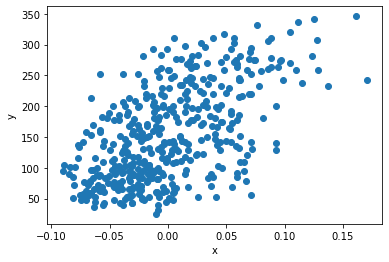

In [191]:
# 당뇨병 환자 데이터 시각화 하기 (data의 3번째 feature와 target)
import matplotlib.pyplot as plt
# x, y 
plt.scatter(diabetes.data[:,2], diabetes.target)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [192]:
# 상관계수
import numpy as np

np.corrcoef(diabetes.data[:,2],diabetes.target)

array([[1.        , 0.58645013],
       [0.58645013, 1.        ]])

---
# 경사 하강법
: 경사하강법은 모델이 데이터를 잘 표현할 수 있도록 기울기(변화율)를 사용하여 모델을 조금씩 조정하는 최적화 알고리즘

# 예측값과 변화율 
### 예측값(y^)
- 예측값은 하나의 모델에서 수식의 결과로 나온 값을 의미합니다

### 훈련데이터에서 잘 맞는 w와 b를 찾는 방법
1. 무작위로 w와 b를 정한다.
2. x에서 샘플 하나를 선택하여 y^를 계산한다
3. y^과 선택한 샘플의 실제 y를 비교한다. (예측한 값과 정답 비교하기 : 오차 구하기)
4. y^ 이 y와 가까와지도록 w,b를 조정한다. (모델 조정하기 : 학습하기)
5. 모든 샘플을 처리할 때까지 2) ~ 4)항목을 반복합니다.


> 예측값이 정답값에 수렴할수록 좋은 알고리즘이다

In [193]:
# 훈련 데이터의 feature와 target 정하기 
x = diabetes.data[:,2]
y = diabetes.target

# 5개만 출력 
print(x[:5])
print(y[:5])

[ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469]
[151.  75. 141. 206. 135.]


In [194]:
# w, b 초기화 : 무작위 선택
w = 1.0
b = 1.0 

In [195]:
# 훈련데이터의 첫번째 샘플을 가져오기
y_hat = x[0] * w + b
y_hat

1.0616962065186886

In [196]:
# 예측 데이터와 target 비교
print(y_hat)
print(y[0])

1.0616962065186886
151.0


> 당연한 결과지만 target과 예측값이 너무 많은 차이가 발생

### w값 조절
- w와 b를 조금씩 변경해서 y_hat이 증가, 감소 보기

In [197]:
# 기존 w에 0.1만 증가해 보기
w_inc = w  + 0.1
y_hat_inc = w_inc * x[0] + b
y_hat_inc 

1.0678658271705574

> y_hat보다 y_hat_inc이 조금 더 target에 근접해짐

In [198]:
# w값 조정한 후 예측값 정도 확인하기
# w가 0.1 증가 할때 y_hat이 얼마나 증가했는지 계산해보기(변화율 확인해보기)
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
w_rate
# 미분 변화율값

0.061696206518688734

> w_rate(변화율)이 x[0]가 동일하다.

In [199]:
# 0.1 로 할 때 되니 0.2로 바꾸어서 계산해보자
w_inc = w  + 0.2
y_hat_inc = w_inc * x[0] + b
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
w_rate 

0.06169620651868769

In [200]:
# 훈련데이터의 2번째 값을 계산해보자 
w_inc = w +0.1
y_hat = x[1] * w + b
y_hat_inc = x[1] * w_inc   + b
# 변화율
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
w_rate 

-0.05147406123880644

![](../Data/gredient.png)

In [201]:
# 변화율에 대한 증명이 끝났으니 다시 훈련데이터 1번째 값으로 변화율을 구해보지 

w = b = 1
y_hat = x[0] * w + b
y_hat_inc = w + 0.1

y_hat_inc = x[0] * w_inc + b
# 변화율
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
w_rate 

0.061696206518688734

# 변화율로 가중치를 업데이트 하기 
### 학습하기

In [202]:
w_new = w + w_rate      # 가중치 + 변화율
w_new

1.0616962065186888

In [203]:
# 변화율로 절편 업데이트 하기 <- 학습하기
b_inc = b +0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

b_rate = ( y_hat_inc -y_hat) / (b_inc - b)
print(b_rate)

1.0678658271705574
0.061696206518688734


In [204]:
b_new = b +1
b_new

2

In [205]:
# 오차 역전파로 가중치와 절편을 업데이트 -> 손실함수(비용함수)를 제공 
# 오차 역전파(backpropagation)는 y^과 y의 차이를 이용하여 w와 b를 업데이트 합니다. 
# 오차의 변화율을 곱하여 가중치 업데이트 하기
 
# 오차 
err = y[0] - y_hat  # y_hat = y^
w_new = w + w_rate * err
b_new = b + b_rate * err
print(w_new, b_new)


10.250624555904514 10.250624555904514


In [206]:
# 2번째 샘플을 x[1]을 사용하여 오차를 구하고 새로운 w, b 구하기
y_hat = w_new * x[1] +b_new
err = y[0] - y_hat
w_rate = x[1]

w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

2.9785227456119667 151.52764127612664


In [207]:
# 반복문을 통한 전체 샘플을 반복학
 
w = b= 1
for x_i,y_i in zip(x,y):   
    y_hat = x_i * w +b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err    # w 가중치
    b = b + 1* err          # b 절편

print(w,b)


587.8654539985689 99.40935564531424


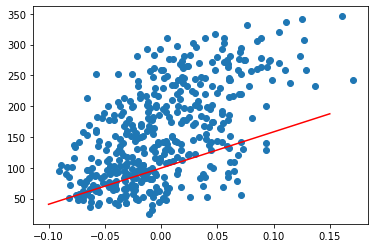

In [208]:
# 데이터 샘플 2 
plt.scatter(x,y)
# 산포도에서 x축 범위를 보면 -0.1 ~ 0.15의 범위 
pt1 = (-0.1,  w * -0.1 +b)
pt2 = (0.15,  w * 0.15 +b)
plt.plot([pt1[0],pt2[0]], [pt1[1],pt2[1]],'r')  # r= red 
plt.show()

> 적절한 기울기의 회귀선은 아님

In [209]:
# epoch로 반복하기 (학습 반복)
## w와 b를 반복적으로 계산하기 
w = b= 1
for _ in range(100):
    for x_i,y_i in zip(x,y):   
        y_hat = x_i * w +b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err    # w 가중치
        b = b + 1* err          # b 절편

print(w,b)

913.5973364345905 123.39414383177204


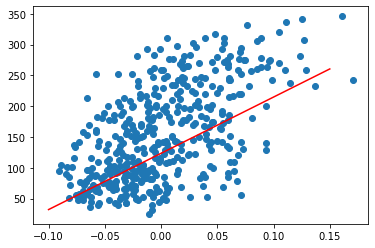

In [210]:
# 데이터 샘플 2 
plt.scatter(x,y)
# 산포도에서 x축 범위를 보면 -0.1 ~ 0.15의 범위 
pt1 = (-0.1,  w * -0.1 +b)
pt2 = (0.15,  w * 0.15 +b)
plt.plot([pt1[0],pt2[0]], [pt1[1],pt2[1]],'r')  # r= red 
plt.show()

> y_ = 913.6X +123.4
##### w = 913.6
##### b= 123.4

In [211]:
# 모델로 예측해보기
# x의 범위 0.15를 벗어나는 곳에서 잘 학습하는지 예측 
x_new = 0.18
y_pred = x_new * w +b
y_pred

287.8416643899983

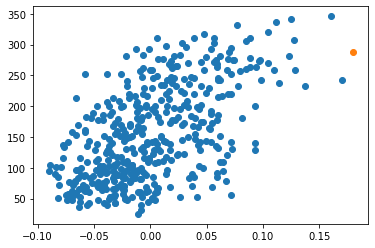

In [212]:
plt.scatter(x,y)
plt.scatter(x_new,y_pred)
plt.show()

---
# 모델 만들기 정리
1. w와 b를 임의의 값(1,1)로 초기화 하고 훈련데이터의 샘플을 하나씩 대입하여 y와 y^의 오차를 구한다
2. 1.에서 구한 오차를 w와 b의 변화율에 곱하고 이 값을 이용하여 w와 b를 업데이트(학습)한다.
3. 만약 y^이 y보다 커지는 오차는 음수가 되어 자동으로 w와 b가 줄어드는 방향으로 업데이트가 된다.
4. 반대로 y^이 y보다 작으면 오차는 양수가 되어 w와 b눈 더 커지도록 업데이트(학습)된다.

### 선형 회귀를 위한 class 만들기

In [219]:
class LRModel: 
    # 초기화 작업
    def __init__(self):
        self.w = 1.0 # 가중치를 초기화
        self.b = 1.0 # 절편을 초기화
    # 정방형 계산
    def forpass(self,x):
        y_hat = x *self.w + self.b # 직선 방정식을 계산
        return y_hat
    # 역방향 계산 (오차율이 들어감)
    def backprop(self,x,err):
        w_grad = x * err # 가중치에 대한 그래디언트를 계산
        b_grad = 1 * err # 절편에 대한 그래디언트를 계산
        return w_grad, b_grad
    # 훈련
    def fit(self,x,y,epoch):   # w,b는 epoch의 크기에 따라 
        for _ in range(epoch):
            for x_i,y_i in zip(x,y):
                y_hat = self.forpass(x_i)
                err = (y_i - y_hat)
                w_grad, b_grad = self.backprop(x_i,err)
                self.w += w_grad
                self.b += b_grad
        return self.w, self.b

In [220]:
# instance
lrmodel = LRModel()
# 학습
w, b = lrmodel.fit(x,y,100)
print(w,b)

913.5973364345905 123.39414383177204


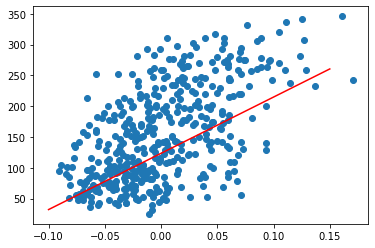

In [221]:
plt.scatter(x,y)
# 산포도에서 x축 범위를 보면 -0.1 ~ 0.15의 범위 
pt1 = (-0.1,  w * -0.1 +b)
pt2 = (0.15,  w * 0.15 +b)
plt.plot([pt1[0],pt2[0]], [pt1[1],pt2[1]],'r')  # r= red 
plt.show()

---
# 용어 정리 
#### 선형회귀
선형방적식을 사용하여 연속적인 값을 예측하는 알고리즘으로 데이터를 가장 잘 표현하는 방정식의 계수를 구할 수 있습니다. 
머신러닝 알고리즘이지만 딥러닝에서 사용하는 인공신뎡망 알고리즘의 기초가 됩니다.

#### 경사하강버
최적화 알고리즘 중의 하나로 핵심 훈련 알고리즘입니다
이 바업은 최적의 모델을 만드는 가중치를 한번에 찾지 않습니다
먼저 임의로 정한 가중치에서 출력을 만든후 타깃과 비교하여 오차를 줄이는 방향으로 가중치를 조정합니다
이런 과정의 모든 훈련샘플에 대해서 반복하면서 최적의 가중치를 찾습니다


#### 손실함수
모델이 얼마만큼 오류가 있는지 측정하는 기준입니다
손실함수의 값을 최소로 만드는 것이 이 모델 훈련의 목적입니다
다른 말로 비용함수 또는 목적함수라고도 부릅니다 